In [657]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, matthews_corrcoef, \
    confusion_matrix, ConfusionMatrixDisplay, classification_report
import pandas as pd
import matplotlib.pyplot as plt

In [658]:
data = pd.read_csv("wine.csv")
X = data.drop(["target"], axis=1)
y = data["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9)

In [659]:
dt = DecisionTreeClassifier()
dt_model = dt.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

In [660]:
print(f"Accuracy is {accuracy_score(y_test, dt_pred)}")
print(f"Recall is {recall_score(y_test, dt_pred)}")
print(f"Specificity is {recall_score(y_test, dt_pred, pos_label=1)}")
print(f"Precision is {precision_score(y_test, dt_pred)}")
print(f"F1-Score is {f1_score(y_test, dt_pred)}")
print(f"MCC is {matthews_corrcoef(y_test, dt_pred)}")

Accuracy is 0.8888888888888888
Recall is 0.828125
Specificity is 0.828125
Precision is 0.9814814814814815
F1-Score is 0.8983050847457628
MCC is 0.7914672795166295


In [661]:
report = classification_report(y_test, dt_pred)
with open("classificationreport.txt", "w") as f:
    f.write(report)
    f.close()

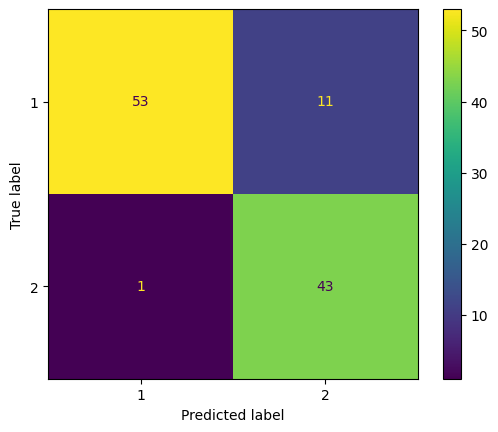

In [662]:
cm = confusion_matrix(y_test, dt_pred, labels=dt_model.classes_)
cm_visual = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt_model.classes_)
cm_visual.plot()
plt.show()